**1) Используя pandas загрузить набор данных о игроках NBA и вывести первые пять записей**


In [7]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

df=pd.read_csv('nba_2013.csv')
df.head()


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


Используя загруженный набор выполнить:
    - В переменную numeric_cols занести все числовые данные о игроках nba и удалить столбцы с NaN
    (используется команда dropna(axis=1))
    - Выполнить кластеризацию (разбить на 5 кластеров) на числовых данных с использованием алгоритма KMeans

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA

#заносим все числовые значения в переменную и удаляем столбцы NaN
numeric_cols = df[[col for col, type in df.dtypes.items() if type in [np.int64, np.float64]]]
numeric_cols = numeric_cols.dropna(axis=1)

#выполняем кластеризацию 
# Описываем модель
model = KMeans(n_clusters=5)
 
# Проводим моделирование
model.fit(numeric_cols)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

1. Выполнить визуализацию c использованием двух признаков Total points и Total assists
2. Выполнить визуализацию c использованием двух признаков Age и played

*Пояснить полученные графики*

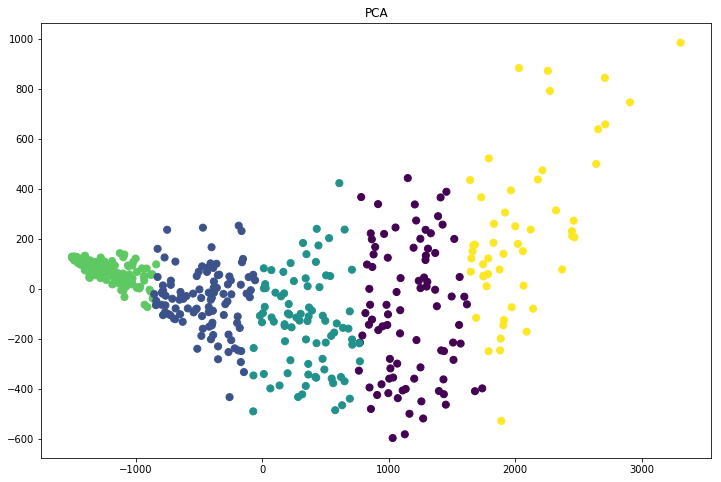

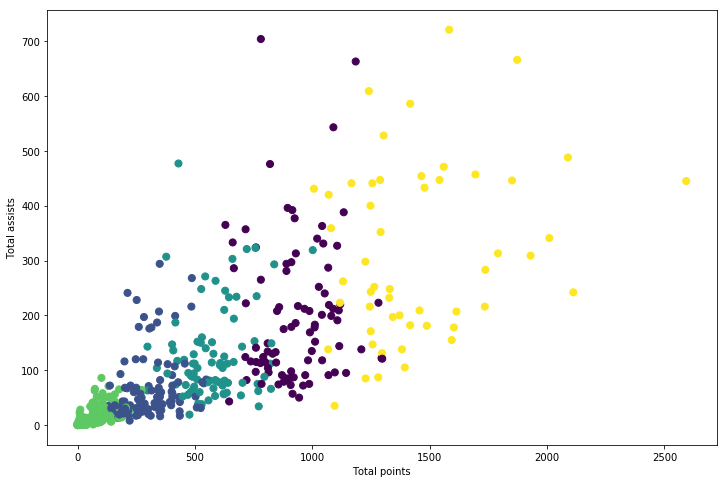

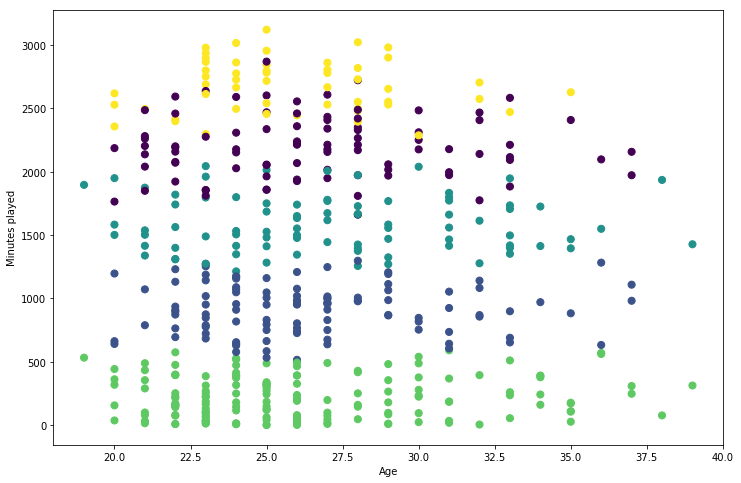

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Визуализация с использование PCA
pca = PCA(n_components=2)
res = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=model.labels_, s=50, cmap='viridis')
plt.title('PCA')

# kod 1 
pca1 = PCA(n_components=2)
res1 = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.xlabel('Total points')
plt.ylabel('Total assists')
plt.scatter(numeric_cols['pts'], numeric_cols['ast'], c=model.labels_, s=50, cmap='viridis')

# kod 2
pca2 = PCA(n_components=2)
res2 = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.xlabel('Age')
plt.ylabel('Minutes played')
plt.scatter(numeric_cols['age'], numeric_cols['mp'], c=model.labels_, s=50, cmap='viridis')
 